## 1. Import all necessary libraries and functions

In [55]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import math
import re
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

## 2. Import and read all cleaned up data frames for analysis

#### As data frames for each position is very big, we separated them into individual data frame first.

In [2]:
analyst_df = pd.read_csv("Data/Main_Data_Frame.csv")
engineer_df = pd.read_csv("Data/Data_Engineer.csv")
scientist_df = pd.read_csv("Data/Data_Scientist_DataFrame.csv")

#### Analysing the shape of each data frame, looks like 'Data Engineer' is the most popular job in GlassDoor...

In [3]:
print(analyst_df.shape)
print(engineer_df.shape)
print(scientist_df.shape)

(177, 9)
(574, 9)
(312, 9)


In [4]:
total_raw_rows = analyst_df.shape[0] + engineer_df.shape[0] + scientist_df.shape[0]
total_raw_rows

1063

In [5]:
analyst_df = analyst_df.rename(columns={'new_overall_score':'overall_score'})
analyst_df["Job_Category"] = "Data Analyst"
analyst_df.shape

(177, 10)

In [6]:
engineer_df = engineer_df[['Unnamed: 0','company', 'title', 'location','EmpBasicInfo', 'employerStats', 'JobDescriptionContainer', 'salary','overall_score']]
engineer_df["Job_Category"] = "Data Engineer"
engineer_df.shape

(574, 10)

In [7]:
scientist_df = scientist_df[['Unnamed: 0','company', 'title', 'location','EmpBasicInfo', 'employerStats', 'JobDescriptionContainer', 'salary','overall_score']]
scientist_df["Job_Category"] = "Data Scientist"
scientist_df.shape

(312, 10)

## 3. Combine all dataframes into one single data frame

In [8]:
combined_df = pd.concat([analyst_df,engineer_df,scientist_df])
combined_df.shape

(1063, 10)

In [9]:
combined_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            302, 303, 304, 305, 306, 307, 308, 309, 310, 311],
           dtype='int64', length=1063)

In [10]:
combined_df = combined_df.reset_index()
combined_df.shape

(1063, 11)

In [11]:
combined_df

,index,Unnamed: 0,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,0,1,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,1,2,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,2,3,Pernod Ricard,Data Analyst,NaN,Company Overview\nSize\n10000+ Employees\nFoun...,4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,3,4,Hays,Data Business Analyst (ETL),Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,4,5,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...
1058,307,963,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Lai Chi Kok,Company Overview\nSize\nUnknown\nType\nCompany...,3.0\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,Responsibilities: Responsible for the structur...,HK$276K - HK$480K (Glassdoor Est.),3.0,Data Scientist
1059,308,964,CargoSmart Limited,Data Science / Machine Learning Trainee,Sha Tin,Company Overview\nSize\n201 to 500 Employees\n...,3.6\n★★★★★\n100 %\nRecommend to a friend\nN/A\...,Accelerate your career\n\nExperience a taste o...,HK$120K - HK$312K (Glassdoor Est.),3.6,Data Scientist
1060,309,1000,NaN,INTERN: Data Scientist,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n74 %\nRecommend to a friend\n78 %\...,Responsibilities :\nAssist in projects in data...,NaN,3.7,Data Scientist
1061,310,1008,DFS Group,Graduate Development Program (Data Science) 20...,Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.6\n★★★★★\n62 %\nRecommend to a friend\n80 %\...,JOB DESCRIPTION\nThe Graduate Development prog...,NaN,3.6,Data Scientist


In [12]:
combined_df.columns

Index(['index', 'Unnamed: 0', 'company', 'title', 'location', 'EmpBasicInfo',
       'employerStats', 'JobDescriptionContainer', 'salary', 'overall_score',
       'Job_Category'],
      dtype='object')

## 4. Clean up the data frame as necessary

#### Let's start by dropping those pesky index columns on the left.

In [13]:
combined_df = combined_df.drop(columns=["index","Unnamed: 0"])
combined_df.head()

,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,Pernod Ricard,Data Analyst,NaN,Company Overview\nSize\n10000+ Employees\nFoun...,4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,Hays,Data Business Analyst (ETL),Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


In [14]:
combined_df.shape

(1063, 9)

#### Firstly, drop all rows for which "company" column shows nothing. Missing "company" indicates low-quality data.

In [15]:
combined_df = combined_df[combined_df["company"].notna()]
combined_df.shape

(1029, 9)

#### Now let's fix those 'EmpBasicInfo' and separate accordingly

In [16]:
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].str.split("\n")
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].apply(lambda x: x[1:] if type(x)==list else np.nan)
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].apply(lambda x: {i:k for i,k in zip(x[0::2],x[1::2])} if type(x)==list else np.nan)

combined_df["EmpBasicInfo"]

0       {'Size': '10000+ Employees', 'Founded': '2000'...
1                                                     NaN
2       {'Size': '10000+ Employees', 'Founded': '1975'...
3       {'Size': '5001 to 10000 Employees', 'Founded':...
4       {'Size': '1 to 50 Employees', 'Type': 'Company...
                              ...                        
1057    {'Size': '1 to 50 Employees', 'Type': 'Company...
1058    {'Size': 'Unknown', 'Type': 'Company - Private...
1059    {'Size': '201 to 500 Employees', 'Founded': '2...
1061    {'Size': '5001 to 10000 Employees', 'Founded':...
1062    {'Size': '10000+ Employees', 'Type': 'Company ...
Name: EmpBasicInfo, Length: 1029, dtype: object

In [17]:
combined_df = combined_df.reset_index()
print(combined_df.shape)
combined_df.head()

(1029, 10)


,index,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,"{'Size': '10000+ Employees', 'Founded': '2000'...",3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,2,Pernod Ricard,Data Analyst,NaN,"{'Size': '10000+ Employees', 'Founded': '1975'...",4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,3,Hays,Data Business Analyst (ETL),Hong Kong,"{'Size': '5001 to 10000 Employees', 'Founded':...",3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,"{'Size': '1 to 50 Employees', 'Type': 'Company...",2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


#### Separate into different lists based on each respective variable.

In [18]:
temp_size_list = []
temp_year_list = []
temp_type_list = []
temp_industry_list = []
temp_sector_list = []

for i in range(len(combined_df)):
    if type(combined_df["EmpBasicInfo"][i])==dict:
        try:
            temp_size_list.append(combined_df["EmpBasicInfo"][i]["Size"])
        except:
            temp_size_list.append(np.nan)
        try:
            temp_year_list.append(combined_df["EmpBasicInfo"][i]["Founded"])
        except:
            temp_year_list.append(np.nan)
        try:
            temp_type_list.append(combined_df["EmpBasicInfo"][i]["Type"])
        except:
            temp_type_list.append(np.nan)
        try:
            temp_industry_list.append(combined_df["EmpBasicInfo"][i]["Industry"])
        except:
            temp_industry_list.append(np.nan)
        try:
            temp_sector_list.append(combined_df["EmpBasicInfo"][i]["Sector"])
        except:
            temp_sector_list.append(np.nan)
            
    else:
        temp_size_list.append(np.nan)
        temp_year_list.append(np.nan)
        temp_type_list.append(np.nan)
        temp_industry_list.append(np.nan)
        temp_sector_list.append(np.nan)

combined_df["Company_Size"] = pd.Series(temp_size_list)
combined_df["Found_Year"] = pd.Series(temp_year_list)
combined_df["Company_Type"] = pd.Series(temp_type_list)
combined_df["Industry"] = pd.Series(temp_industry_list)
combined_df["Sector"] = pd.Series(temp_sector_list)

combined_df.head()

,index,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector
0,0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,"{'Size': '10000+ Employees', 'Founded': '2000'...",3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance
1,1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN
2,2,Pernod Ricard,Data Analyst,NaN,"{'Size': '10000+ Employees', 'Founded': '1975'...",4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing
3,3,Hays,Data Business Analyst (ETL),Hong Kong,"{'Size': '5001 to 10000 Employees', 'Founded':...",3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services
4,4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,"{'Size': '1 to 50 Employees', 'Type': 'Company...",2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services


#### How is the data frame looking right now after dropping the unnecessary columns?

In [19]:
combined_df = combined_df.drop(columns=["index","EmpBasicInfo", "employerStats","JobDescriptionContainer"])
combined_df.head()

,company,title,location,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,NaN,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing
3,Hays,Data Business Analyst (ETL),Hong Kong,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services


#### Let's go now by separating the salary into lower and upper ranges.

In [20]:
combined_df["salary"] = combined_df["salary"].apply(lambda x: re.findall("([H].+[K])",x)[0] if type(x)==str else np.nan)
combined_df["Lower_salary"] = combined_df["salary"].apply(lambda x: re.findall("(\d+)",x)[0] if type(x)==str else np.nan)
combined_df["Upper_salary"] = combined_df["salary"].apply(lambda x: re.findall("(\d+)",x)[-1] if type(x)==str else np.nan)
combined_df.head()

,company,title,location,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,NaN,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN
3,Hays,Data Business Analyst (ETL),Hong Kong,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN


In [21]:
print(combined_df.shape)
print(combined_df.columns)

(1029, 13)
Index(['company', 'title', 'location', 'salary', 'overall_score',
       'Job_Category', 'Company_Size', 'Found_Year', 'Company_Type',
       'Industry', 'Sector', 'Lower_salary', 'Upper_salary'],
      dtype='object')


In [22]:
combined_df = combined_df[['company', 'title','Job_Category', 'location', 'overall_score', 'Company_Size', 'Found_Year', 'Company_Type', 'Industry', 'Sector', 'salary', 'Lower_salary', 'Upper_salary']]
combined_df.drop(columns=["salary"])

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN
1025,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,276,480
1026,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000,Company - Private,IT Services,Information Technology,120,312
1027,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN


In [23]:
print(combined_df.shape)
print()
print(combined_df.dtypes)

(1029, 13)

company           object
title             object
Job_Category      object
location          object
overall_score    float64
Company_Size      object
Found_Year        object
Company_Type      object
Industry          object
Sector            object
salary            object
Lower_salary      object
Upper_salary      object
dtype: object


# 5. Let's do some fun analysis!

### (5.1) On 19 June 2021, Hong Kong's overall data job market on GlassDoor contained a total of 1,029 jobs.
<ul>
    <li><strong>175</strong> Data Analyst positions</li>
    <li><strong>544</strong> Data Engineer positions</li>
    <li><strong>310</strong> Data Scientist positions</li>
</ul>

In [24]:
combined_df['Job_Category'].value_counts()

Data Engineer     544
Data Scientist    310
Data Analyst      175
Name: Job_Category, dtype: int64

52.86685824394226
30.126336216926575
17.006802558898926


<AxesSubplot:ylabel='Job_Category'>

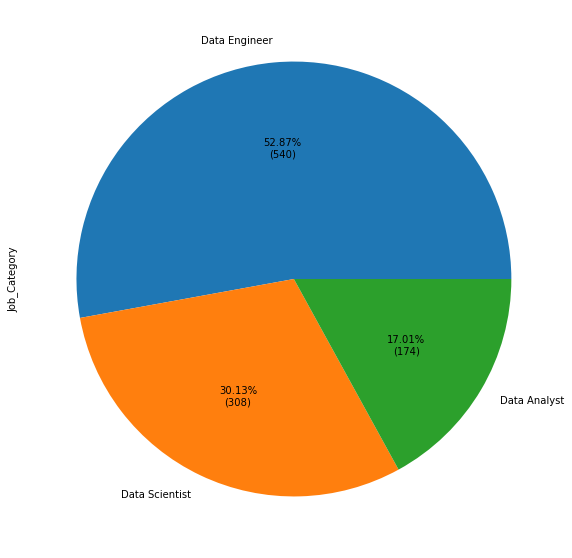

In [261]:
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, 1022*x/100)

combined_df['Job_Category'].value_counts().plot.pie(figsize=(10,10), rot=0, autopct=my_fmt)

### (5.2) The split of these 3 jobs are dominated by the top 10 industries, which cover 348 out of 1,029 positions we scraped on GlassDoor (33.82%).

In [26]:
combined_df['Industry'].value_counts().nlargest(10)

Staffing & Outsourcing                   92
Investment Banking & Asset Management    51
Banks & Credit Unions                    34
Security Services                        33
IT Services                              31
Consulting                               29
Architectural & Engineering Services     22
Construction                             21
Internet                                 20
Computer Hardware & Software             14
Name: Industry, dtype: int64

<AxesSubplot:>

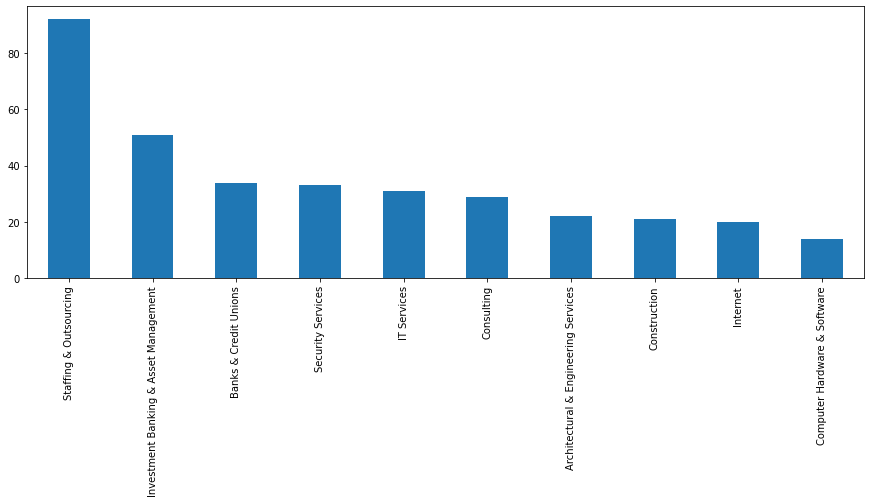

In [119]:
combined_df['Industry'].value_counts().nlargest(10).plot.bar(figsize=(15,5))

In [115]:
combined_df['Sector'].value_counts().nlargest(10)

Business Services                     188
Finance                                95
Information Technology                 70
Manufacturing                          35
Retail                                 26
Construction, Repair & Maintenance     21
Transportation & Logistics             19
Media                                  13
Telecommunications                     12
Insurance                              11
Name: Sector, dtype: int64

<AxesSubplot:>

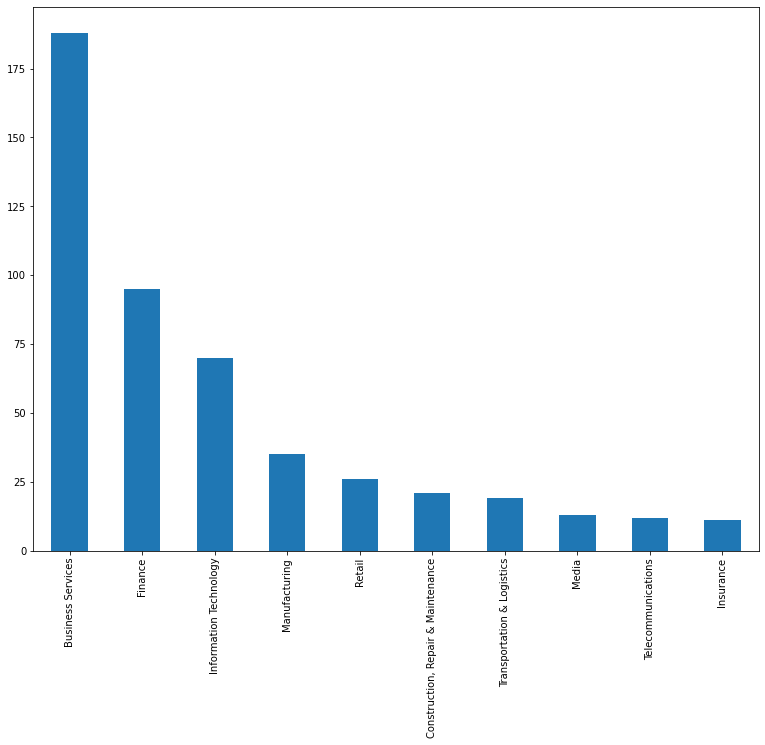

In [160]:
combined_df['Sector'].value_counts().nlargest(10).plot.bar(figsize=(13,10
                                                                ))

However, upon closer check based on each 'Job_Category', the outcome is different.
<ul>
    <li><strong>Data Analyst</strong> is more likely to be posted by the direct hiring company.
    <li>Quite often, <strong>Data Engineer</strong> and <strong>Data Scientist</strong> roles are handled by recruiting firms.
</ul>

In [54]:
a = combined_df.groupby(['Job_Category', 'Industry'])['Industry'].count()
b = combined_df.groupby(['Job_Category'])['Industry'].count()
c = pd.DataFrame(((a / b) * 100).round(2))

In [57]:
ratio_analyst = df2[df2['Job_Category'] == 'Data Analyst']['Sector'].value_counts()/

Business Services                   25
Finance                             22
Information Technology               8
Retail                               4
Insurance                            4
Media                                3
Manufacturing                        3
Arts, Entertainment & Recreation     2
Health Care                          2
Education                            1
Accounting & Legal                   1
Government                           1
Telecommunications                   1
Biotech & Pharmaceuticals            1
Transportation & Logistics           1
Real Estate                          1
Name: Sector, dtype: int64

<strong>Another assumptions that we can deduce are as follow:</strong>
<ul>
    <li>Outside <i>Staffing & Recruitment</i>, <i>Investment Banking & Asset Management</i> are the most active hiring industry in data-oriented job market.</li>
    <li>We somewhat believe that Glassdoor isn't a good website to scrape information to analyse the job market. The fact that <i>Data Engineer</i> is in most demand in <i>Construction</i> and <i>Architectural & Engineering Services</i> somewhat makes us believe that the keywords got mixed up with other types of "engineers".</li>
</ul>

<AxesSubplot:ylabel='Job_Category'>

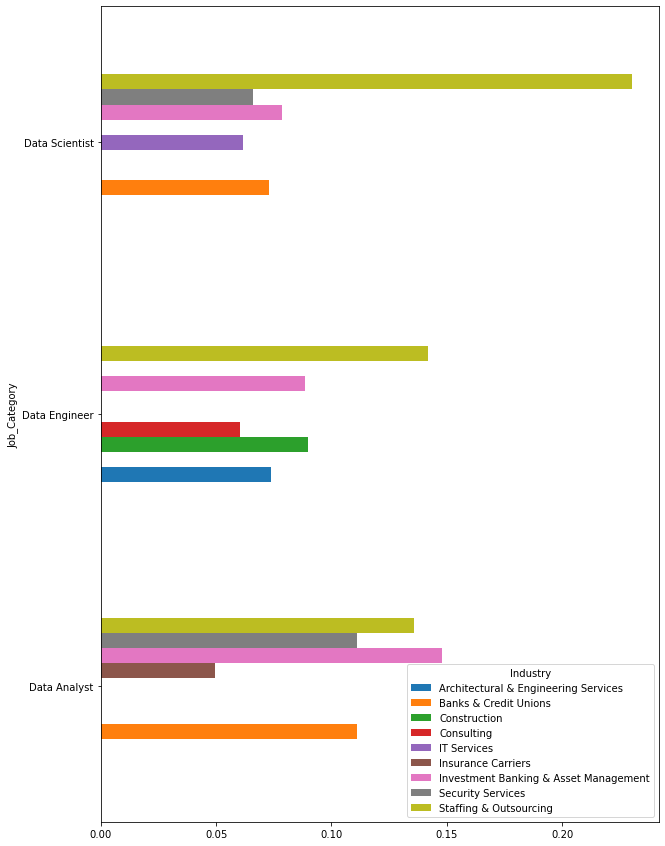

In [171]:
df_industry = pd.DataFrame([('Data Scientist', 'Staffing & Outsourcing', 0.2303),
                          ('Data Analyst', 'Investment Banking & Asset Management', 0.1481),
                          ('Data Engineer', 'Staffing & Outsourcing', 0.1418),
                          ('Data Analyst', 'Staffing & Outsourcing', 0.1358),
                          ('Data Analyst', 'Banks & Credit Unions', 0.1111),
                          ('Data Analyst', 'Security Services', 0.1111),
                          ('Data Engineer', 'Investment Banking & Asset Management', 0.0887),
                          ('Data Scientist', 'Investment Banking & Asset Management', 0.0787),
                          ('Data Scientist', 'Banks & Credit Unions', 0.0730),
                          ('Data Engineer', 'Construction', 0.0900),
                          ('Data Engineer', 'Architectural & Engineering Services', 0.074),
                          ('Data Scientist', 'IT Services', 0.0618),
                          ('Data Engineer', 'Consulting', 0.0603),
                          ('Data Scientist', 'Security Services', 0.0662),
                          ('Data Analyst', 'Insurance Carriers', 0.0494)],
                          columns = ['Job_Category', 'Industry', 'Ratio'])

df_industry.pivot(index='Job_Category', columns='Industry', values='Ratio').plot.barh(figsize=(10,15))

In [30]:
df2 = pd.read_csv("Data/combined_dataframe_revised.csv")
df2 = df2.drop(columns=["Unnamed: 0","salary"])
df2

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000.0,Company - Public,Banks & Credit Unions,Finance,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975.0,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968.0,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN
1018,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,276.0,480.0
1019,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000.0,Company - Private,IT Services,Information Technology,120.0,312.0
1020,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960.0,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN


In [31]:
df2.groupby('Job_Category').mean()

,overall_score,Found_Year,Lower_salary,Upper_salary
Job_Category,,,,
Data Analyst,2.938372,1952.328358,245.137931,411.672414
Data Engineer,3.959213,1967.246575,265.111675,443.959391
Data Scientist,3.800000,1964.814570,258.952381,468.961905


In [45]:
df2.groupby('Job_Category').count()

,company,title,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
Job_Category,,,,,,,,,,,
Data Analyst,172,172,171,172,150,67,150,80,80,58,58
Data Engineer,541,538,538,483,500,219,500,280,280,197,197
Data Scientist,309,306,309,268,284,151,284,178,178,105,105


Highest starting mean salary for each job category and industry:

<strong>Data Analyst</strong>
<ul>
    <li>Stock Exchanges: HKD 420,000</li>
    <li>Health Care Services & Hospitals: HKD 360,000</li>
    <li>IT Services: HKD 310,000</li>
    <li>Staffing & Outsourcing: HKD 294,000</li>
    <li>Federal Agencies: HKD 282,000</li>
</ul>

<strong>Data Engineer</strong>
<ul>
    <li>Transportation Management: HKD 479,667</li>
    <li>Consumer Products & Manufacturing: HKD 445,000</li>
    <li>Logistics & Supply Chain: HKD 420,000</li>
    <li>Investment Banking & asset Management: HKD 390,750</li>
    <li>Motion Picture Production & Distribution: HKD 389,000</li>
</ul>

<strong>Data Scientist</strong>
<ul>
    <li>Colleges & Universities: HKD 451,000</li>
    <li>Internet: HKD 364,000</li>
    <li>Drug & Health Stores: HKD 345,667</li>
    <li>Logistics & Supply Chain: HKD 336,000</li>
    <li>Banks & Credit Unions: HKD 335,167</li>
</ul>


In [32]:
df2.groupby(['Job_Category', 'Industry'])['Lower_salary'].mean().nlargest(30)

Job_Category    Industry                                
Data Engineer   Transportation Management                   479.666667
Data Scientist  Colleges & Universities                     451.000000
Data Engineer   Consumer Products Manufacturing             445.200000
Data Analyst    Stock Exchanges                             420.000000
Data Engineer   Logistics & Supply Chain                    420.000000
                Investment Banking & Asset Management       390.750000
                Motion Picture Production & Distribution    389.000000
                Biotech & Pharmaceuticals                   374.333333
                Express Delivery Services                   372.000000
Data Scientist  Internet                                    364.000000
Data Analyst    Health Care Services & Hospitals            360.000000
Data Engineer   Hotels, Motels, & Resorts                   360.000000
Data Scientist  Drug & Health Stores                        345.666667
Data Engineer   Brok

<AxesSubplot:xlabel='overall_score', ylabel='Upper_salary'>

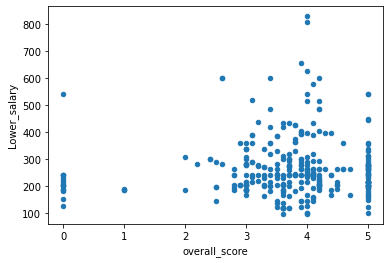

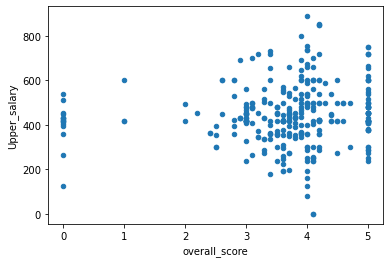

In [34]:
df2.plot.scatter(x = 'overall_score', y = 'Lower_salary')
df2.plot.scatter(x = 'overall_score', y = 'Upper_salary')

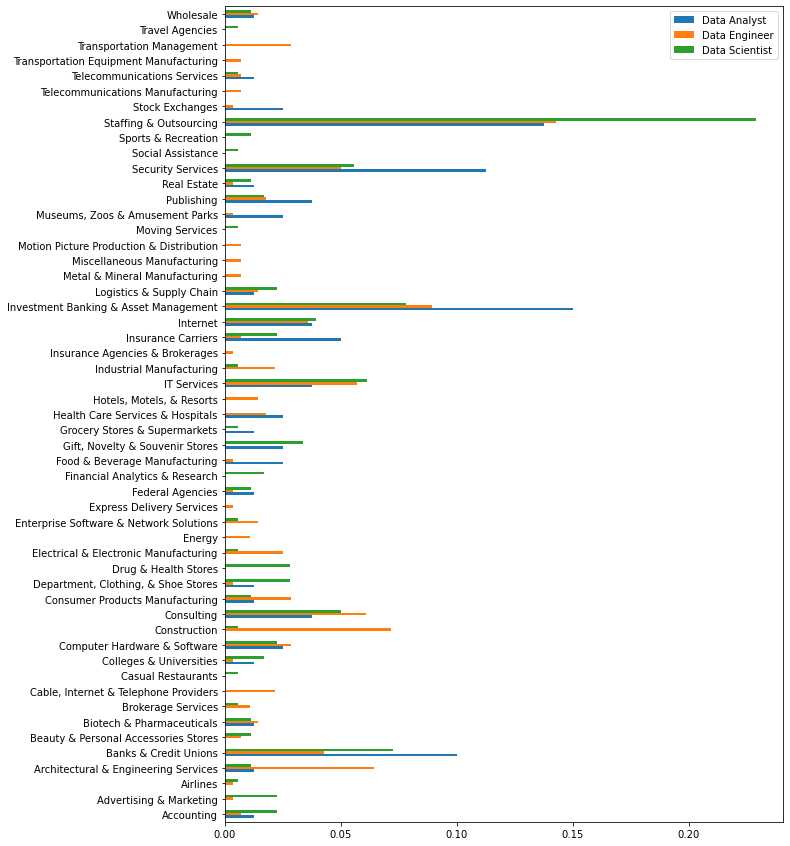

In [110]:
industry_ratio_analyst = df2[df2['Job_Category'] == 'Data Analyst']['Industry'].value_counts()/80
industry_ratio_engineer = df2[df2['Job_Category'] == 'Data Engineer']['Industry'].value_counts()/280
industry_ratio_scientist = df2[df2['Job_Category'] == 'Data Scientist']['Industry'].value_counts()/179
index = list(set(df2['Sector']))
df_sector = pd.DataFrame({'Data Analyst': industry_ratio_analyst, 'Data Engineer': industry_ratio_engineer, 'Data Scientist': industry_ratio_scientist})
ax = df_sector.plot.barh(figsize=(10,15))

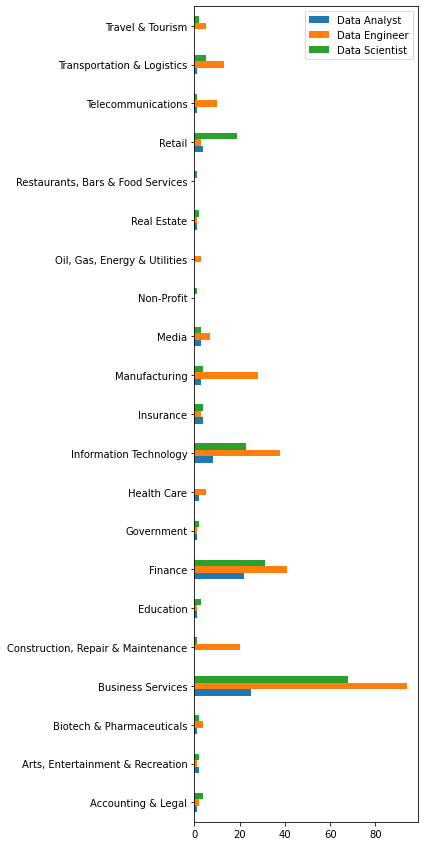

In [167]:
sector_analyst = df2[df2['Job_Category'] == 'Data Analyst']['Sector'].value_counts()
sector_engineer = df2[df2['Job_Category'] == 'Data Engineer']['Sector'].value_counts()
sector_scientist = df2[df2['Job_Category'] == 'Data Scientist']['Sector'].value_counts()
index = list(set(df2['Sector']))
df_sector = pd.DataFrame({'Data Analyst': sector_analyst, 'Data Engineer': sector_engineer, 'Data Scientist': sector_scientist})
ax_sector = df_sector.plot.barh(figsize=(4,15))

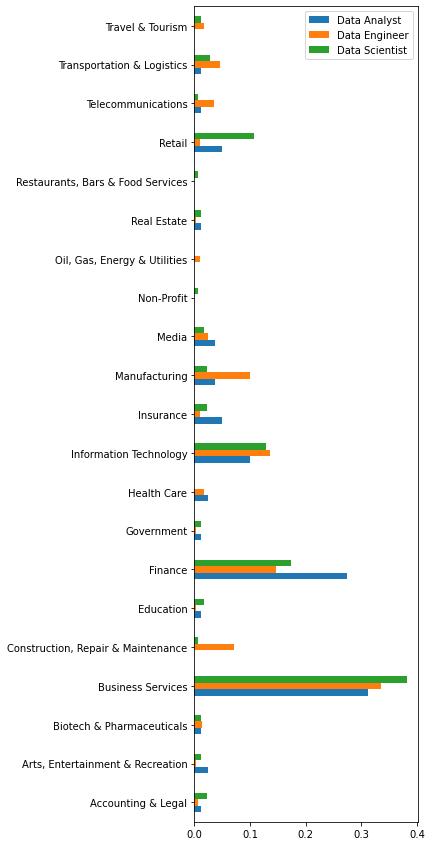

In [166]:
sector_ratio_analyst = df2[df2['Job_Category'] == 'Data Analyst']['Sector'].value_counts()/80
sector_ratio_engineer = df2[df2['Job_Category'] == 'Data Engineer']['Sector'].value_counts()/280
sector_ratio_scientist = df2[df2['Job_Category'] == 'Data Scientist']['Sector'].value_counts()/178
index = list(set(df2['Sector']))
df_sector_ratio = pd.DataFrame({'Data Analyst': sector_ratio_analyst, 'Data Engineer': sector_ratio_engineer, 'Data Scientist': sector_ratio_scientist})
ax_sector_ratio = df_sector_ratio.plot.barh(figsize=(4,15))

In [172]:
df2

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000.0,Company - Public,Banks & Credit Unions,Finance,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975.0,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968.0,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN
1018,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,276.0,480.0
1019,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000.0,Company - Private,IT Services,Information Technology,120.0,312.0
1020,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960.0,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN


In [202]:
df2['Mean_salary'] = (df2['Lower_salary']+df2['Upper_salary'])/2
df2

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary,Mean_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000.0,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975.0,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968.0,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN,NaN
1018,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,276.0,480.0,378.0
1019,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000.0,Company - Private,IT Services,Information Technology,120.0,312.0,216.0
1020,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960.0,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN,NaN


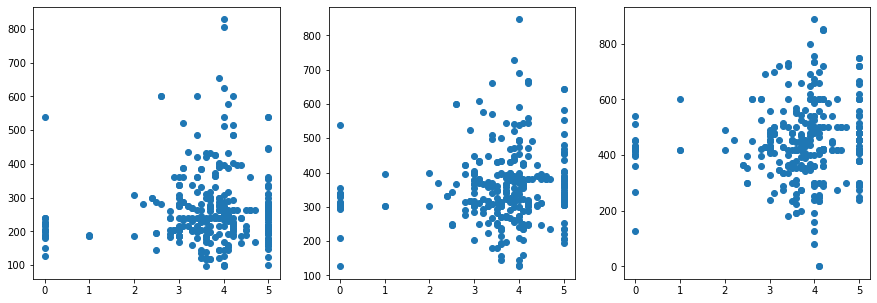

In [204]:
lower_salary = df2['Lower_salary']
upper_salary = df2['Upper_salary']
mean_salary = df2['Mean_salary']
rating = df2['overall_score']

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax.scatter(rating, lower_salary)
ax2.scatter(rating, mean_salary)
ax3.scatter(rating, upper_salary)

In [206]:
df2[['overall_score', 'Lower_salary']].corr()

,overall_score,Lower_salary
overall_score,1.000000,0.064952
Lower_salary,0.064952,1.000000


In [207]:
df2[['overall_score', 'Mean_salary']].corr()

,overall_score,Mean_salary
overall_score,1.000000,0.102862
Mean_salary,0.102862,1.000000


In [208]:
df2[['overall_score', 'Upper_salary']].corr()

,overall_score,Upper_salary
overall_score,1.000000,0.106653
Upper_salary,0.106653,1.000000


In [249]:
df2.groupby(['Sector', 'Job_Category'])['Mean_salary'].mean().sort_values()

Sector                              Job_Category  
Arts, Entertainment & Recreation    Data Analyst      144.000000
Telecommunications                  Data Engineer     219.000000
Media                               Data Analyst      253.000000
Real Estate                         Data Scientist    273.000000
                                    Data Analyst      273.000000
Biotech & Pharmaceuticals           Data Analyst      300.000000
Media                               Data Scientist    303.000000
Construction, Repair & Maintenance  Data Engineer     304.300000
Business Services                   Data Engineer     311.937500
Information Technology              Data Engineer     315.375000
Accounting & Legal                  Data Engineer     315.500000
Business Services                   Data Analyst      317.850000
Telecommunications                  Data Analyst      320.500000
Manufacturing                       Data Scientist    332.500000
Business Services                   Dat

/Users/atjokrosaputro/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


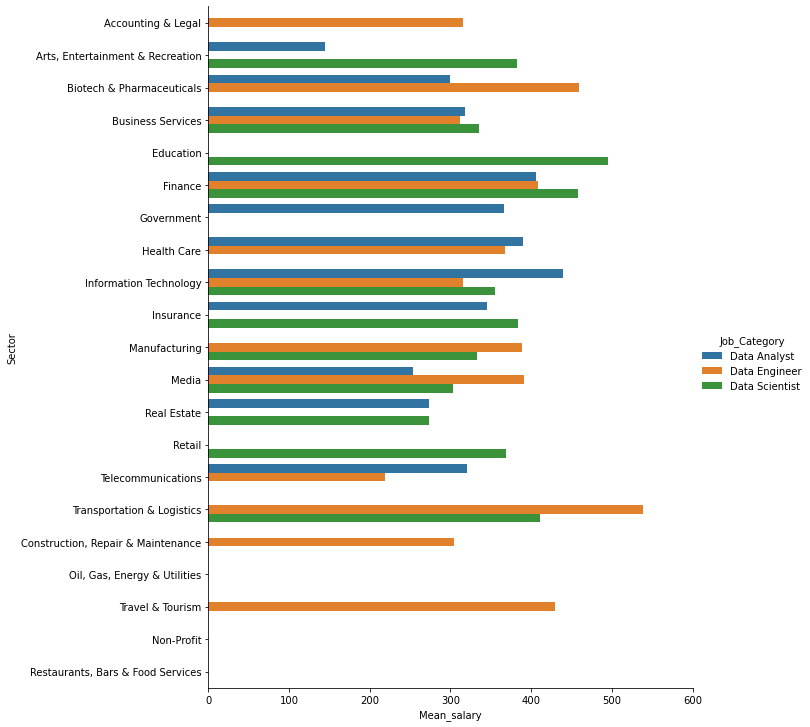

In [250]:
import seaborn as sns
sector_salary = pd.DataFrame(df2.groupby(['Job_Category', 'Sector'])['Mean_salary'].mean()).reset_index().reset_index()

sector_salary_chart = sns.factorplot(height = 10, orient='h', kind = 'bar', x = 'Mean_salary', y = 'Sector', hue = 'Job_Category', data = sector_salary)
sector_salary_chart.set_xticklabels()

In [266]:
df2.groupby('Sector').get_group('Real Estate')

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary,Mean_salary
94,Sun Hung Kai Properties,Data Analyst / Assistant Data Analyst - SQL / ...,Data Analyst,Hong Kong,3.7,10000+ Employees,1972.0,Company - Public,Real Estate,Real Estate,273.0,273.0,273.0
463,JLL,"Director, Data Centre Platform Leader – APAC/E...",Data Engineer,Hong Kong,3.9,10000+ Employees,NaN,Company - Public,Real Estate,Real Estate,NaN,NaN,NaN
862,HongKong Land,Business Analytics Manager,Data Scientist,Hong Kong,4.1,501 to 1000 Employees,NaN,Company - Public,Real Estate,Real Estate,NaN,NaN,NaN
944,Sun Hung Kai Properties,Data Analyst / Assistant Data Analyst - SQL / ...,Data Scientist,Hong Kong,3.7,10000+ Employees,1972.0,Company - Public,Real Estate,Real Estate,273.0,273.0,273.0
